In [19]:
#Place dataset in current working directory
#from IPython.external import mathjax; mathjax.install_mathjax()
import os
path = os.getcwd()
import pandas
df = pandas.read_csv(path + '/stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [20]:
df['Subject'] = df.index+1
df

,Congruent,Incongruent,Subject
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


###1. What is our independent variable? What is our dependent variable?

INDEPENDENT - Word Condition (Congruent or Incongruent)  
DEPENDENT   - Response Time in seconds

###2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Ho - **Null Hypothesis**: (  μi - μc = 0 ) There is **no** significant difference in the population average response time in viewing the congruent(c) words vs viewing the incongruent(i) words.

Ha - **Alternative Hypothesis**: ( μi - μc ≠ 0 ) There is a significant difference, positive or negative, in the population average response times.

The Dependent Samples t-Test is the appropriate statistical test as the same subjects are assigned two different conditions. The different conditions are dependent because, in theory, by doing the first test you have some practice doing it and you might have an unfair advantage due to this learning effect in doing the similar type of test second. In addition, we don't have any population parameters provided (so a z-test would not be appropriate here).

###3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [21]:
c = df['Congruent']; i = df['Incongruent']

In [22]:
c_mean = c.mean(); round(c_mean,2)

14.050000000000001

In [23]:
i_mean = i.mean(); round(i_mean,2)

22.02

In [24]:
c_sd = c.std(); round(c_sd,2)

3.5600000000000001

In [25]:
i_sd = i.std(); round(i_sd,2)

4.7999999999999998

###4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

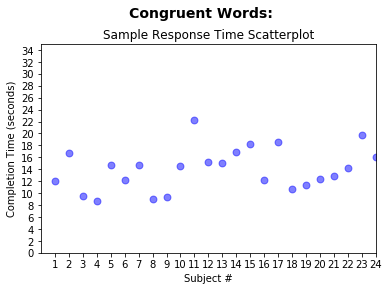

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = len(df)
x = df['Subject']
y = df['Congruent']
colors = 'blue'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('Congruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()


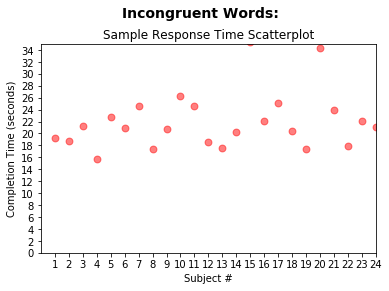

In [27]:
N = len(df)
x = df['Subject']
y = df['Incongruent']
colors = 'red'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('Incongruent Words: ', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sample Response Time Scatterplot')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time (seconds)')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

The congruent words sample has a distribution which is between 8 and 22 seconds and has a lower average completion time compared to the incongruent words scatterplot which shows the distibtuion is between 15 to about 26 seconds with what appears to be one outlier at 35 seconds. The average completion time is definitely higher.

###5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Confidence Level = 90%  
t-critical value (2-sided test) -> from [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)  
df = n - 1 = 24  
tcrit =  +- 1.711

In [28]:
#number of subjects in the sample
n = len(df)
n

24

In [29]:
#point estimate of μi - μc -> PE (in seconds)
PE = i_mean - c_mean
round(PE,2)

7.96

In [30]:
#s - sample standard deviation of differences
#1. D = sample difference
df['D'] = df['Incongruent'] - df['Congruent']
df

,Congruent,Incongruent,Subject,D
0,12.079,19.278,1,7.199
1,16.791,18.741,2,1.950
2,9.564,21.214,3,11.650
3,8.630,15.687,4,7.057
4,14.669,22.803,5,8.134
5,12.238,20.878,6,8.640
6,14.692,24.572,7,9.880
7,8.987,17.394,8,8.407
8,9.401,20.762,9,11.361
9,14.480,26.282,10,11.802


In [31]:
#2. DFM = difference from the mean
#SQD = squared differences from the mean
DFM = df['D'] - df['D'].mean()
df['SQD'] = DFM*DFM
df

,Congruent,Incongruent,Subject,D,SQD
0,12.079,19.278,1,7.199,0.586437
1,16.791,18.741,2,1.950,36.177719
2,9.564,21.214,3,11.650,13.580760
3,8.630,15.687,4,7.057,0.824086
4,14.669,22.803,5,8.134,0.028631
5,12.238,20.878,6,8.640,0.455906
6,14.692,24.572,7,9.880,3.668023
7,8.987,17.394,8,8.407,0.195548
8,9.401,20.762,9,11.361,11.534231
9,14.480,26.282,10,11.802,14.724168


In [35]:

#3. SSD = sum of squared differences
SSD = df['SQD'].sum()
SSD

544.3304399583335

In [38]:
#4. v = variance = SSD/(n-1)
v = SSD/(n-1)
v

23.666540867753632

In [39]:
#5. s = sqrt(v)
from math import *
s = sqrt(v)
round(s,2)

4.86

In [33]:
#t-statistic
#t = PE/(s/√n)
#PE = (μi - μc)
t = PE/(s/(sqrt(n)))
round(t,4)

8.0206999999999997

t-statistic > t-critical  
8.0207 > 1.711

###Conclusion:

We **reject** the Null Hypothesis which states that there is no significant differences between the population average completion time for the two different conditions (Congruent & Incongruent). In theory,
if we were able to calculate the average difference of every single person person who took this pair of tests (the population) we expect there would be a significantly slower or significantly faster time in either the the incongruent or congruent condition. These are the results I expected since my own anecdotal experience showed that the second condition took me longer to complete. 